In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pmaw import PushshiftAPI
api = PushshiftAPI()


def fxn(item):
    return (item['score'] > 0) & (item['over_18'] == False)
posts = api.search_submissions(filter_fn=fxn, subreddit="chessbeginners", limit=50000)
post_list = [post for post in posts]

len(post_list)


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift sh

29732

In [30]:
df = pd.DataFrame(post_list)
start = 27000
inc = 10
for i in range(start,start+inc):
    print(f'i = {i}')
    print(df['title'].iloc[i])
    print(f'\t{df["full_link"].iloc[i]}')

i = 27000
Chess.com Subscription Worth It?
	https://www.reddit.com/r/chessbeginners/comments/fs1213/chesscom_subscription_worth_it/
i = 27001
Bishop and Knight Checkmate! Also make sure to subscribe, leave a like, and comment if you want to learn anything about chess! -ChessRook-e
	https://www.reddit.com/r/chessbeginners/comments/frvbzo/bishop_and_knight_checkmate_also_make_sure_to/
i = 27002
Looks like I accidentally posted the Trap Tuesday video early 🤣. Anyway hope you guys enjoy! ♟️
	https://www.reddit.com/r/chessbeginners/comments/frs10m/looks_like_i_accidentally_posted_the_trap_tuesday/
i = 27003
Reached this position gaining the bishop pair, now I'm overwhelmed with candidate moves and no idea how to calculate/choose. Help!
	https://www.reddit.com/r/chessbeginners/comments/frr9y2/reached_this_position_gaining_the_bishop_pair_now/
i = 27004
Which opening would you recommend for black for beginners?
	https://www.reddit.com/r/chessbeginners/comments/frp97j/which_opening_would_you_r

In [11]:
list(zip(df.columns,df.iloc[3033]))

[('all_awardings', []),
 ('allow_live_comments', False),
 ('author', 'AbleCancel'),
 ('author_flair_css_class', None),
 ('author_flair_richtext', []),
 ('author_flair_text', None),
 ('author_flair_type', 'text'),
 ('author_fullname', 't2_3a4dlj64'),
 ('author_is_blocked', False),
 ('author_patreon_flair', False),
 ('author_premium', False),
 ('awarders', []),
 ('can_mod_post', False),
 ('contest_mode', False),
 ('created_utc', 1639630604),
 ('domain', 'i.redd.it'),
 ('full_link',
  'https://www.reddit.com/r/chessbeginners/comments/rhizof/puzzle_from_one_of_my_own_games_i_was_white_and/'),
 ('gildings', {}),
 ('id', 'rhizof'),
 ('is_created_from_ads_ui', False),
 ('is_crosspostable', True),
 ('is_meta', False),
 ('is_original_content', False),
 ('is_reddit_media_domain', True),
 ('is_robot_indexable', True),
 ('is_self', False),
 ('is_video', False),
 ('link_flair_background_color', ''),
 ('link_flair_richtext', []),
 ('link_flair_text_color', 'dark'),
 ('link_flair_type', 'text'),
 ('l

(array([8495., 2823., 1207.,  581.,  335.,  235.,  107.,  128.,  114.,
          92.,   70.,   66.,   54.,   21.,   30.,   28.,   25.,   21.,
          17.,   18.]),
 array([ 2.  ,  6.85, 11.7 , 16.55, 21.4 , 26.25, 31.1 , 35.95, 40.8 ,
        45.65, 50.5 , 55.35, 60.2 , 65.05, 69.9 , 74.75, 79.6 , 84.45,
        89.3 , 94.15, 99.  ]),
 <BarContainer object of 20 artists>)

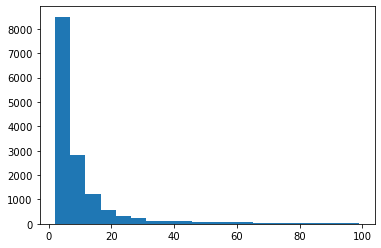

In [31]:
# import seaborn as sns
# sns.histplot(df['num_comments'])
df2 = df[(df['num_comments'] > 1) & (df['num_comments'] < 100)]
plt.hist((df2['num_comments']), bins = 20)
# df['num_comments'].value_counts()

In [25]:
len(df[(df['num_comments']==0) | (df['num_comments']==1)])

15174

In [40]:
df['author_is_blocked'].value_counts()

False    15111
Name: author_is_blocked, dtype: int64

In [57]:
df2 = df[['title', 'created_utc', 'full_link', 'num_comments' ]]

In [50]:
df[[type(x)==bool for x in df['author_is_blocked']]]['author_is_blocked'].value_counts()

False    15111
Name: author_is_blocked, dtype: int64

In [55]:
df['media_only'].value_counts()

False    29397
Name: media_only, dtype: int64

In [56]:
len(df)

29732

In [60]:
df2.to_csv('../data/reddit_chessbeginners.csv')